In [1]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
local_crs = 32636
example_data_path = "./data"

from blocksnet.models import City

from blocksnet.models import City
city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))

In [2]:

city_model = City.from_pickle(os.path.join(example_data_path, 'city_model.pickle'))
points = gpd.read_file(os.path.join(example_data_path, "points_centr.geojson")).to_crs(local_crs)
points

,city_service_type,id,geometry
0,Почта,0,POINT (344978.111 6649514.697)
1,Почта,1,POINT (345942.044 6648924.131)
2,Почтовый ящик,3,POINT (345906.721 6647296.091)
3,Почтовый ящик,4,POINT (343179.633 6648665.945)
4,Почтовый ящик,5,POINT (344307.350 6648373.078)
...,...,...,...
1309,Товары для праздника,1941,POINT (346684.731 6648331.524)
1310,Товары для праздника,1942,POINT (346284.192 6645938.198)
1311,Цветы,1973,POINT (346525.966 6648569.467)
1312,Цветы,1976,POINT (347170.022 6647756.403)


In [3]:
from blocksnet.method import Connectivity

conn = Connectivity(city_model=city_model)
polygons = conn.calculate()
polygons 


,geometry,median
id,,
0,"POLYGON ((344943.719 6647610.514, 344959.205 6...",30.2
1,"POLYGON ((344968.687 6647544.000, 344971.625 6...",30.2
2,"POLYGON ((344929.592 6647257.521, 344931.964 6...",30.5
3,"POLYGON ((344840.676 6647432.974, 344853.943 6...",31.3
4,"POLYGON ((344856.398 6647391.171, 344900.097 6...",31.3
...,...,...
1349,"POLYGON ((346243.206 6647701.284, 346243.206 6...",23.7
1350,"POLYGON ((347483.986 6647345.029, 347483.627 6...",19.0
1351,"POLYGON ((347463.977 6647381.345, 347456.841 6...",18.8


In [4]:
from blocksnet.method import CentralPlace
central = CentralPlace(city_model=city_model)


In [5]:
polygons_ct = central.centrality(points=points)
polygons_ct.sort_values(by='shannon', ascending=False)


/var/folders/h8/0wmx2zx90bn60jw8zc1r4qjc0000gn/T/ipykernel_15908/4156419700.py:1: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  polygons_ct = central.centrality(points=points)


,geometry,median,density,shannon,centrality
id,,,,,
84,"POLYGON ((345399.731 6648295.709, 345407.371 6...",24.6,32,2.209407,2.409524
98,"POLYGON ((345641.699 6649086.934, 345652.338 6...",22.5,13,2.138397,1.992864
218,"POLYGON ((347931.427 6648093.691, 347931.410 6...",21.2,36,2.120593,2.586271
146,"POLYGON ((346882.003 6648178.332, 346883.632 6...",22.8,10,2.025326,1.804795
182,"POLYGON ((347240.083 6647800.554, 347240.124 6...",22.7,11,1.972247,1.785318
...,...,...,...,...,...
274,"POLYGON ((348904.811 6648397.945, 348904.811 6...",31.9,7,-0.000000,-0.533333
271,"POLYGON ((349076.900 6648227.518, 349077.479 6...",30.8,1,-0.000000,-0.623810
263,"POLYGON ((349345.313 6648193.237, 349361.125 6...",27.0,1,-0.000000,-0.442857


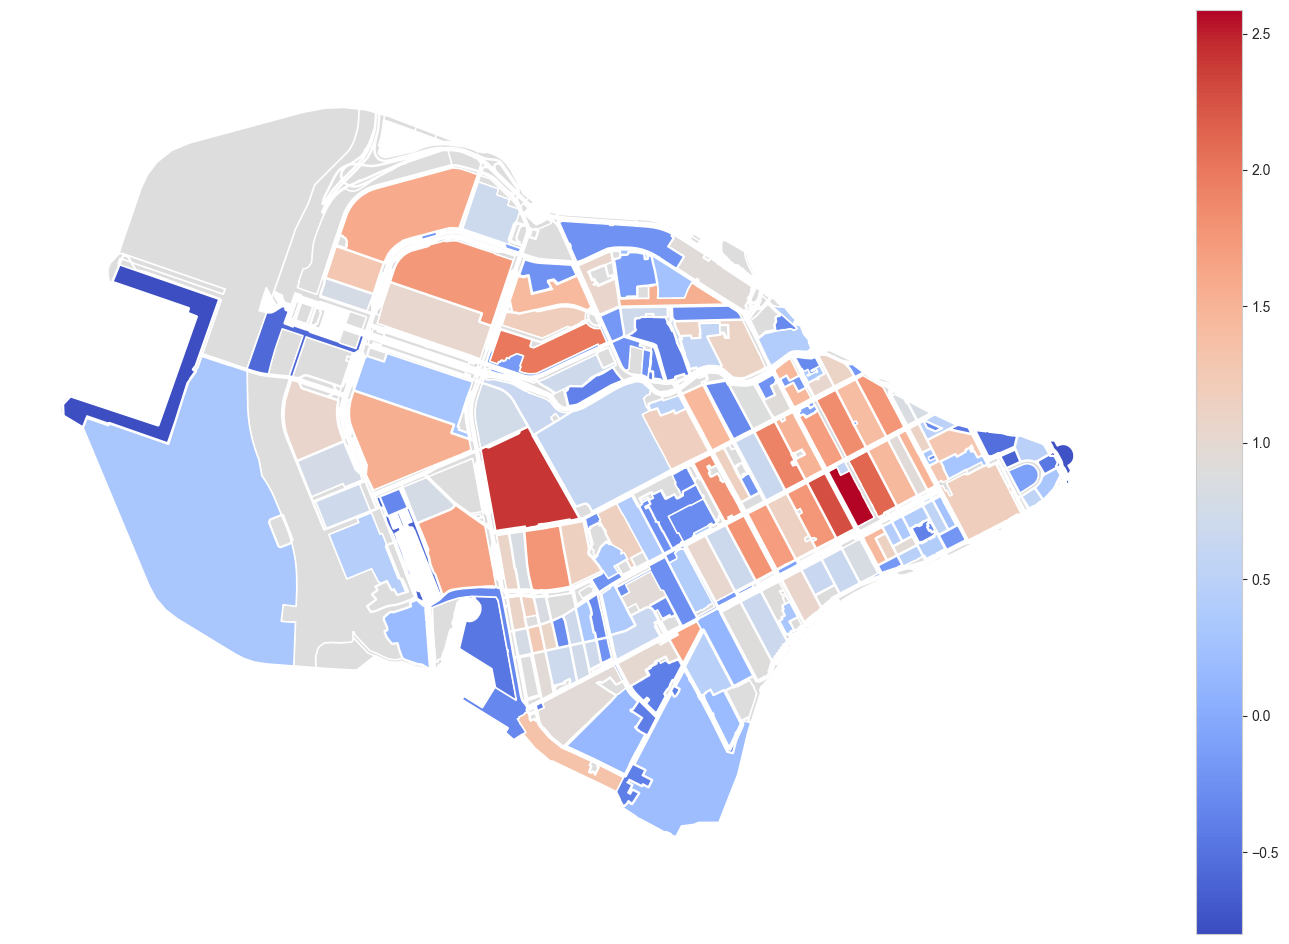

In [6]:
plt.figure(figsize=(18, 12))  
polygons.plot(ax=plt.gca(), color="#ddd", alpha=1)
polygons_ct.plot(ax=plt.gca(), column='centrality', legend=True, cmap='coolwarm')
plt.gca().set_axis_off()
plt.show()